In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

In [12]:
from spatgames import TwoFieldSpatialGame, color_field_change

In [3]:
rng = np.random.default_rng(42)

In this game $2L^2$ individual "*players*" placed in a two two-dimensional spatial array.

Every individual can play one of two tactics: cooperate($\mathcal{C}$) or defect($\mathcal{D}$). At the beginning of the "game", each player has the probability of being assigned $\mathcal{C}$ with probability $p_c$ and tactics $\mathcal{D}$ otherwise.

In each round individuals "*play the game*" with 8 its neighbors and the *average cooperator* from this and another field. Tables of payoffs shown below

Table 1: Payoffs for games with neighbors.

| payoffs | $\mathcal{D}$ | $\mathcal{C}$ |
| --------- |:-------------:|----:|
| $\mathcal{D}$ | 0 | 0 |
| $\mathcal{C}$ | $b_j$ | 1 |

Table 2: Payoffs for games with *average cooperator*

| payoffs | $\mathcal{D}$ | $\mathcal{C}$ |
| --------- |:-------------:|----:|
| $\mathcal{D}$ | 0 | 0 |
| $\mathcal{C}$ | $b_j f_{ci}$ | $f_{ci}$ |

Where $f_ci$ - fraction of cooperators on the field $i$ and $b_i$ payoff on the field $i$
After playing all games the site occupied either by its original owner or by one of the neighbors who scores the highest total payoff in that round.

In general the total payoff $P(x)$ of the agent $\sigma$ with strategy $s(x)$ placed on field $j$ can be calculated as

$$P(x) = \sum_{y\in n.n.}s^T(x)\hat{H}^js(y) + \sum_{i=1}^2\lambda_{ji}s^T(x)\hat{H}^{ji}_{mf}s(y)$$ 

Where
$s(x) = (1,0)^T$ if $x$ - defector and $s(x) = (0,1)^T$ if $x$ - cooperator

Matrix $\hat{H}^j$ have a simmilar form to the Table 1

Matrix $\hat{H}^{ji}$ has a form

| $b_j f_{ci}$ | 0 |
| --------- |:-------------:|
| 0 | $f_{ci}$ |

In this repository implementation of the game considers $\lambda_{ji} = \lambda$ when $i=j$ and $\lambda_{ji} = \mu$ for $i \neq j$

# Initialization

In [4]:
L = 20
b1, b2 = 1.4, 1.6
lam, mu = .3, 1.2
t0, t1 = 1000, 2000 # Persistence(t0, t1)
game = TwoFieldSpatialGame(L, b1, b2, lam, mu, t0, t1)

Set up field

In [5]:
p_c = 0.9
game.field = rng.choice((0, 1), size=(2, L, L), p=(1-p_c, p_c))

In [6]:
game.densities

array([[0.915],
       [0.885]])

In [7]:
game.persistence

(1.0, 1.0)

## Play a few games

In [8]:
game.evolve(2000)

And plot density of cooperators

<IPython.core.display.Javascript object>


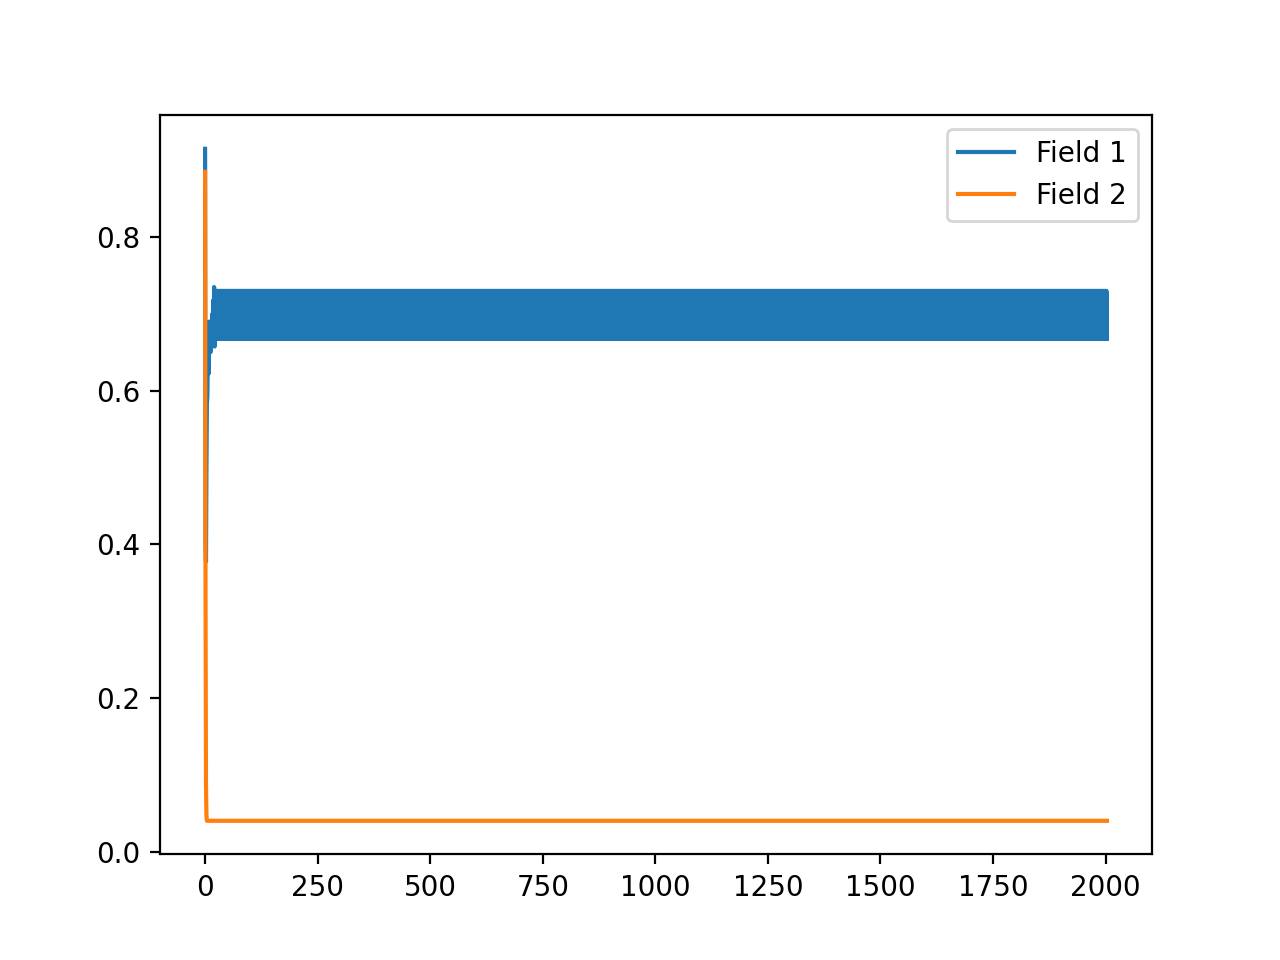

In [18]:
fig = plt.figure()
plt.plot(game.densities[0], label="Field 1")
plt.plot(game.densities[1], label="Field 2")
plt.legend()

In [13]:
game.persistence

(0.33, 0.87)

Now let's look at the field in dynamics

<IPython.core.display.Javascript object>


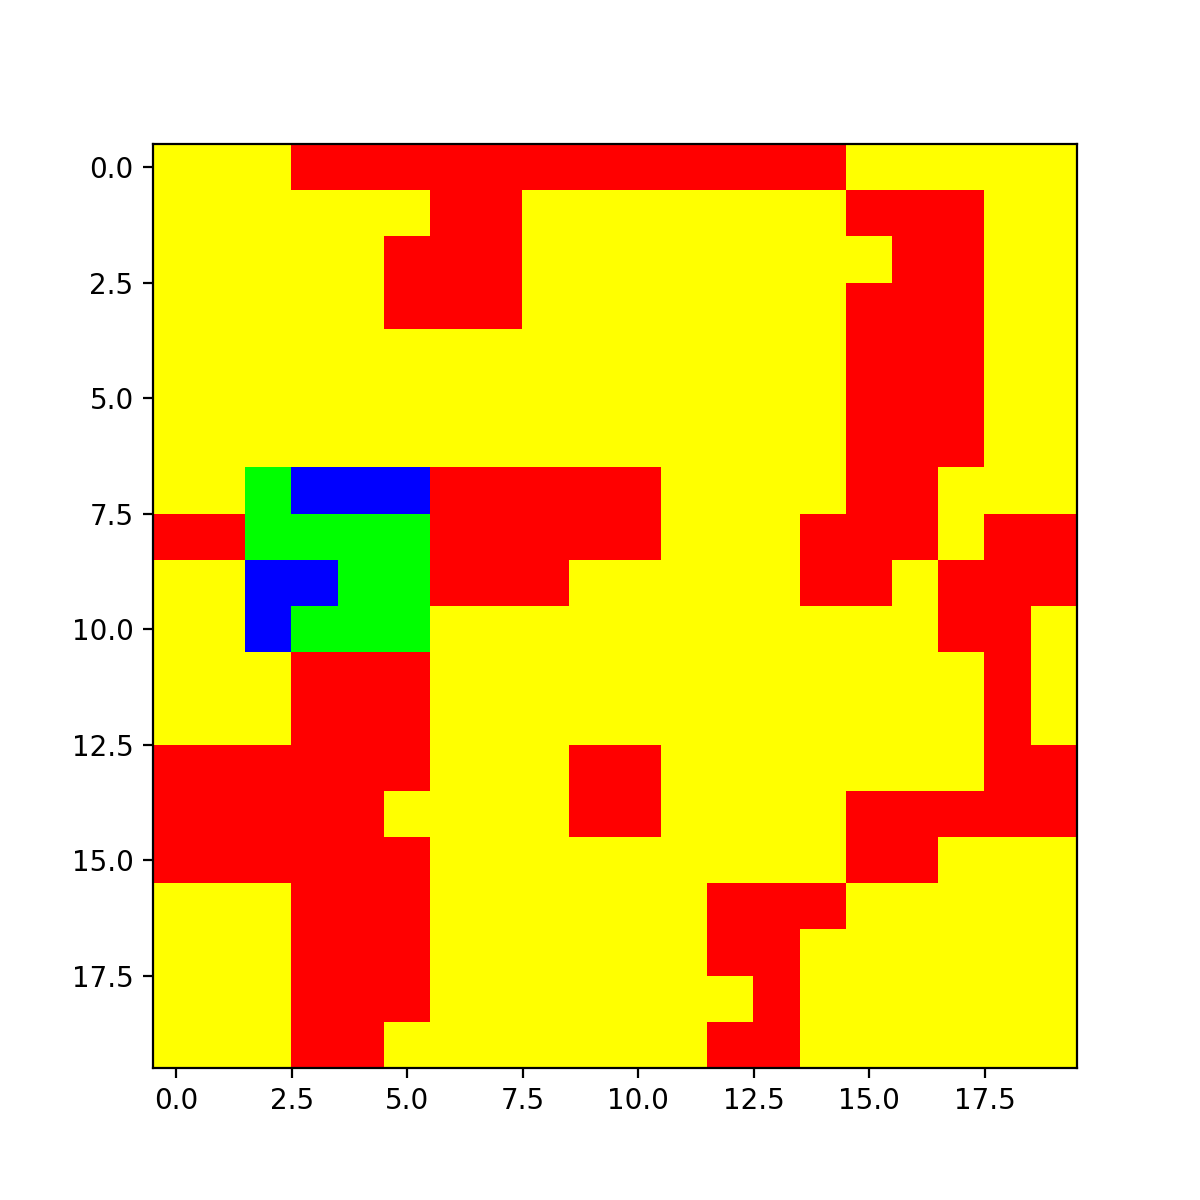

In [16]:
field_old = game.field.astype("int")
game.evolve()
fig = plt.figure(figsize=(6, 6))
plt.imshow(color_field_change(game.field.astype("int")[0], field_old[1]))